In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# load local version of skaro, before pip installed version, for debugging
import pathlib
import sys
import os

sys.path.append(str(pathlib.Path(os.getcwd()).parent.joinpath("src")))

In [3]:
import yt
import numpy as np
import matplotlib.pyplot as plt

from skaro.model import Model
from skaro.particles import rotated_dataset
from skaro.fields import Fields

from skaro.visualization.yt_maps import (
    plot_planet_maps,
    planet_figure_name_formatting,
)

## DATA SETUP

In [4]:
snapshot = 127
resolution = 8192
sim_id = "37_11"
num_embryos = 50
# host_star_masses = (0.1, 0.3, 0.5, 0.7, 1)
host_star_masses = 1
planet_categories = [
    "Earth",
    "Super-Earth",
    "Neptunian",
    "Sub-Giant",
    "Giant",
]

ngpps_bounds = "none"

In [5]:
model = Model(
    snapshot=snapshot,
    resolution=resolution,
    sim_id=sim_id,
    ngpps_hard_bounds=ngpps_bounds,
)
ds = model.ds
mw = model.halo


      DETECTED LOCAL MACHINE: Test snapshot loaded.


      CONFIG: Setting resolution to 4096.


      CONFIG: Setting sim_id to 09_18.



yt : [INFO     ] 2024-03-12 11:58:27,169 Calculating time from 1.000e+00 to be 4.318e+17 seconds
yt : [INFO     ] 2024-03-12 11:58:27,241 Parameters: current_time              = 4.318436660023809e+17 s
yt : [INFO     ] 2024-03-12 11:58:27,242 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2024-03-12 11:58:27,242 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2024-03-12 11:58:27,243 Parameters: domain_right_edge         = [100. 100. 100.]
yt : [INFO     ] 2024-03-12 11:58:27,243 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2024-03-12 11:58:27,244 Parameters: current_redshift          = 4.440892098500626e-16
yt : [INFO     ] 2024-03-12 11:58:27,245 Parameters: omega_lambda              = 0.682
yt : [INFO     ] 2024-03-12 11:58:27,245 Parameters: omega_matter              = 0.318
yt : [INFO     ] 2024-03-12 11:58:27,246 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2024-03-12 11:58:27,247 Parameters: hubble_constant   

## PLOT SETUP

In [6]:
figure_subdirectory = (
    f"MilkyWayAnalogue/{model.resolution}/{model.sim_id}/{model.snapshot}/Planet_maps"
)
save = True

## CREATE DATA SOURCE

In [7]:
radius = 80  # can contain a cube of 80/sqrt(3) = 46 kpc, so plots with a smaller width will have no edge effects
normal_vector = mw.normal_vector("stars", data=mw.sphere(radius=(10, "kpc")))

In [8]:
sphere_data = mw.sphere(radius=ds.quan(radius, "kpc"))

In [9]:
# define (all) planets field to containing all planet categories considered here
model.ds.add_field(
    ("stars", "All Planet"),
    function=lambda field, data: np.sum(
        np.array([data["stars", category] for category in planet_categories]),
        axis=0,
    ),
    sampling_type="local",
    units="auto",
    dimensions=1,
    force_override=True,
)

In [10]:
rotated_sphere_data = rotated_dataset(
    sphere_data,
    mw.centre(),
    normal_vector,
    [
        *[("stars", f"{category}") for category in planet_categories + ["All Planet"]],
    ],
    bounding_box=[[-ds.domain_width[0].to("kpc") / 2, ds.domain_width[0].to("kpc") / 2]]
    * 3,
)

KeyboardInterrupt: 

## FACE-ON MAPS

yt : [INFO     ] 2024-03-11 10:36:28,677 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:36:28,679 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:36:28,682 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:36:28,682 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:36:28,686 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'


yt : [INFO     ] 2024-03-11 10:36:29,502 Splatting (('stars', 'All Planet')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:36:29,698 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:36:29,910 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:36:30,111 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:36:30,339 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'


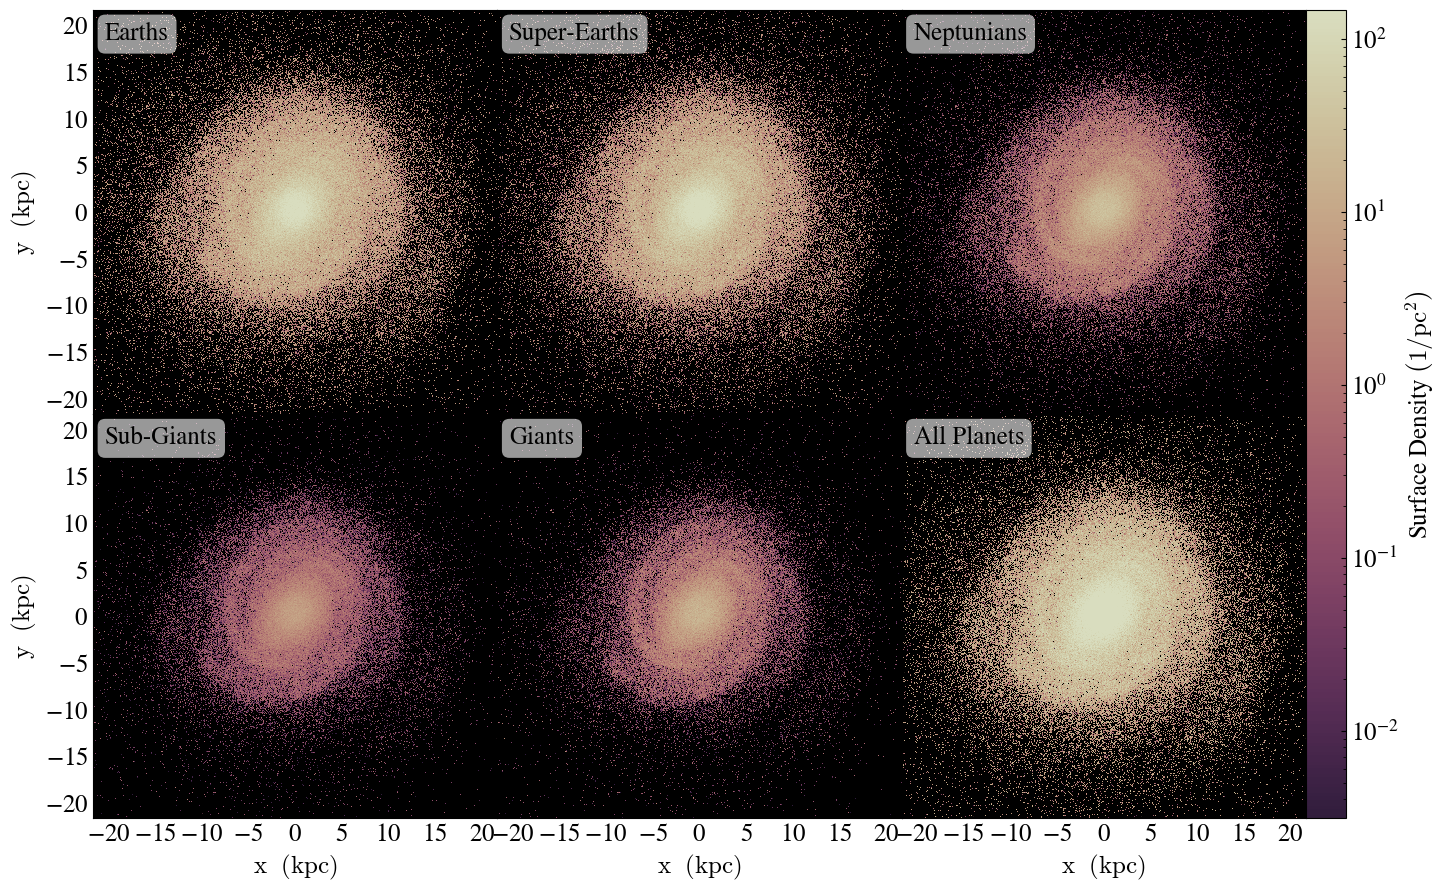

In [ ]:
zplot, zfig = plot_planet_maps(
    planet_categories + ["All Planet"],
    rotated_sphere_data,
    normal="z",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=(
        planet_figure_name_formatting(host_star_masses)
        if ngpps_bounds == "none"
        else planet_figure_name_formatting(host_star_masses) + f"_{ngpps_bounds}"
    ),
)

## SIDE-ON MAPS

yt : [INFO     ] 2024-03-11 10:37:16,270 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:37:16,270 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:37:16,272 xlim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:37:16,273 ylim = -21.650000 21.650000
yt : [INFO     ] 2024-03-11 10:37:16,274 Splatting (('stars', 'Neptunian')) onto a 800 by 800 mesh using method 'cic'


yt : [INFO     ] 2024-03-11 10:37:16,685 Splatting (('stars', 'All Planet')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:37:16,913 Splatting (('stars', 'Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:37:17,145 Splatting (('stars', 'Sub-Giant')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:37:17,589 Splatting (('stars', 'Earth')) onto a 800 by 800 mesh using method 'cic'
yt : [INFO     ] 2024-03-11 10:37:17,815 Splatting (('stars', 'Super-Earth')) onto a 800 by 800 mesh using method 'cic'


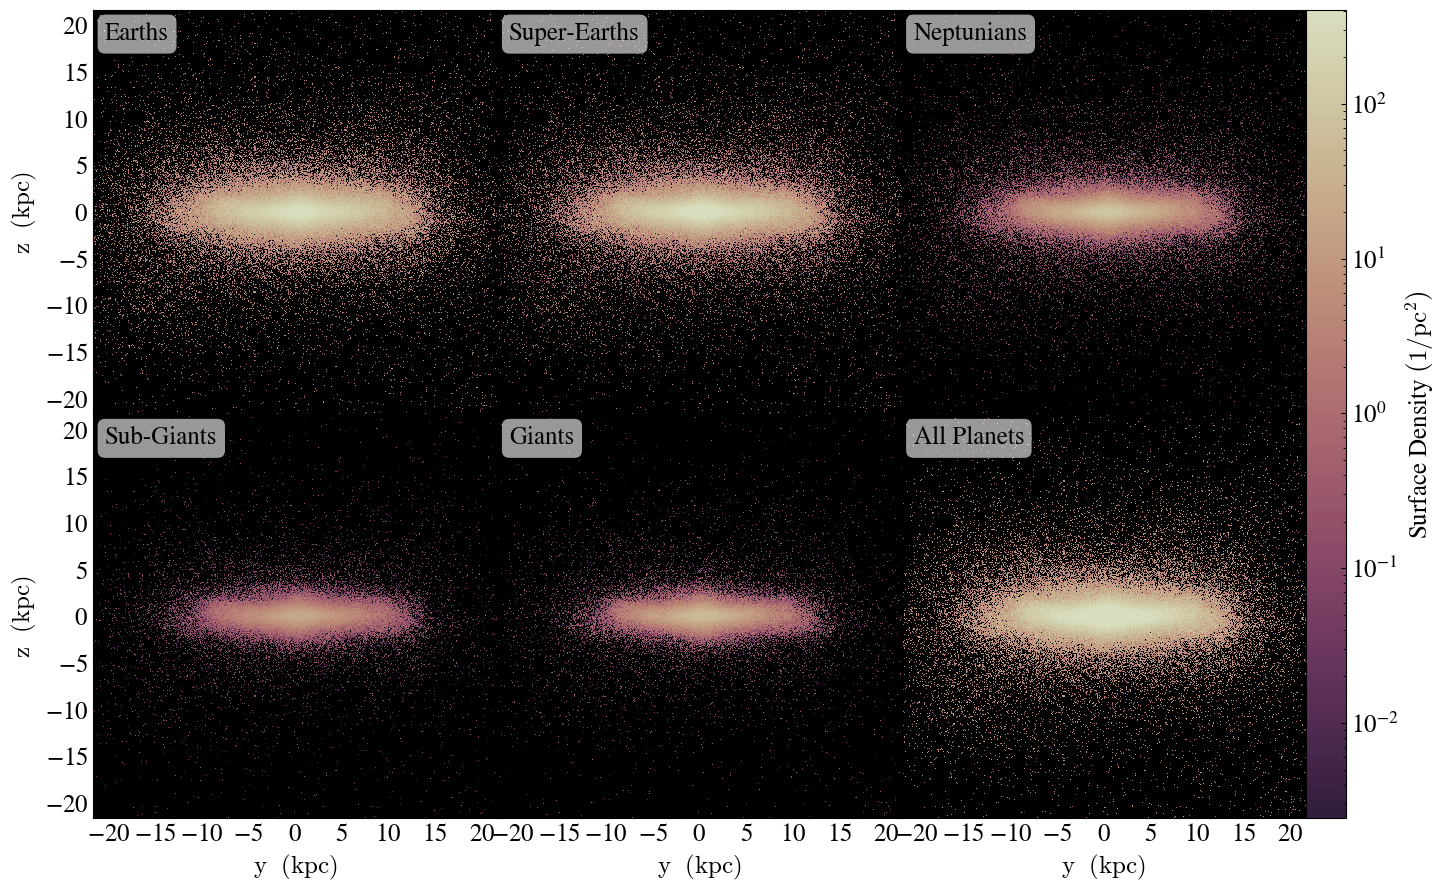

In [ ]:
zplot, zfig = plot_planet_maps(
    planet_categories + ["All Planet"],
    rotated_sphere_data,
    normal="x",
    colorbar_normalisation="global",
    subplot_pad=0,
    save=save,
    figure_subdirectory=figure_subdirectory,
    figure_name_addon=(
        planet_figure_name_formatting(host_star_masses)
        if ngpps_bounds == "none"
        else planet_figure_name_formatting(host_star_masses) + f"_{ngpps_bounds}"
    ),
)